In [14]:
# Python program to illustrate HoughLine
# method for line detection
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# Reading the required image in
# which operations are to be done.
# Make sure that the image is in the same
# directory in which this python program is
img = cv2.imread('casa.webp')
# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply edge detection method on the image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# The below for loop runs till r and theta values
# are in the range of the 2d array
for r_theta in lines:
	arr = np.array(r_theta[0], dtype=np.float64)
	r, theta = arr
	# Stores the value of cos(theta) in a
	a = np.cos(theta)
	# Stores the value of sin(theta) in b
	b = np.sin(theta)
	# x0 stores the value rcos(theta)
	x0 = a*r
	# y0 stores the value rsin(theta)
	y0 = b*r
	# x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
	x1 = int(x0 + 1000*(-b))
	# y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
	y1 = int(y0 + 1000*(a))
	# x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
	x2 = int(x0 - 1000*(-b))
	# y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
	y2 = int(y0 - 1000*(a))
	# cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
	# (0,0,255) denotes the colour of the line to be
	# drawn. In this case, it is red.
	cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# All the changes made in the input image are finally
# written on a new image houghlines.jpg
cv2.imwrite('linesDetected.jpg', img)


True

In [77]:
img = cv2.imread('casa.webp')
original = img

In [117]:
houghLines  = original.copy()

# Hough Line Transform
lines  = cv2.HoughLines(edges, 1, np.pi/180, 30)
# Draw the standart lines
if (lines is not None) and (lines.size < 10):
	for r_theta in lines:
		arr = np.array(r_theta[0], dtype=np.float64)
		r, theta = arr
		a = np.cos(theta)
		b = np.sin(theta)
		x0 = a*r
		y0 = b*r
		x1 = int(x0 + 1000*(-b))
		y1 = int(y0 + 1000*(a))
		x2 = int(x0 - 1000*(-b))
		y2 = int(y0 - 1000*(a))
		cv2.line(houghLines, (x1, y1), (x2, y2), (0, 0, 255), 2)

In [118]:
lines.size

33396

In [16]:
def show3Images(original, standart, probabilistic):
    plt.figure(figsize=(10,10))
    plt.subplot(131),plt.imshow(original,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.axis('off')
    plt.subplot(132),plt.imshow(standart,cmap = 'gray')
    plt.title('Standart'), plt.xticks([]), plt.yticks([])
    plt.axis('off')
    plt.subplot(133),plt.imshow(probabilistic,cmap = 'gray')
    plt.title('Probabilistic'), plt.xticks([]), plt.yticks([])
    plt.axis('off')
    plt.show()

def show2Images(original, transformed):
    plt.figure(figsize=(10,10))
    plt.subplot(121),plt.imshow(original,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.axis('off')
    plt.subplot(122),plt.imshow(transformed,cmap = 'gray')
    plt.title('Transformed'), plt.xticks([]), plt.yticks([])
    plt.axis('off')
    plt.show()    
	
def sortingCoords(x1,x2):
    if x1 > x2:
        return x2, x1
    else:
        return x1, x2

In [129]:
def cropPatch(original, x1, x2, y1, y2):
    #get image dimensions
    plus = 15   
    height,width,c     = original.shape
    x1-=5
    x2+=5
    y1-=plus
    y2+=plus

    if y1 < 0:
        y1 = 0
    if y2 > height:
        y2 = height
    if x1 < 0:
        x1 = 0
    if x2 > width:
        x2 = width

    return original[y1:y2, x1:x2]

# Display the array of images
def dispArrayImages(patc hes):
    n = len(patches)
    if n > 1:
        fig, axs = plt.subplots(1, n , figsize=(10, 10))
        for i in range(n):
            #axs[i].set_title(patches[i][0])
            axs[i].imshow(cv2.cvtColor(patches[i][1], cv2.COLOR_BGR2RGB))
            axs[i].axis('off')
        plt.show()
    if n == 1:
        plt.figure(figsize=(10,10))
        #plt.title(patches[0][0])
        plt.imshow(cv2.cvtColor(patches[0][1], cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

def probHough(mask, original, tresh=20, minPoints=30, maxGap=5):
    probabLines = original.copy()
    edges = cv2.Canny(mask, 100, 200)
    # Probabilistic Line Transform
    linesP = cv2.HoughLinesP(edges, 1, np.pi / 180, tresh, None, minPoints, maxGap)
    dbPatches = []
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            x1, x2 = sortingCoords(l[0], l[2])
            y1, y2 = sortingCoords(l[1], l[3])
            angle = int(np.arctan2(y2 - y1, x2 - x1) * 180. / np.pi)
            # Draw the probabilistic lines
            cv2.line(probabLines, (l[0], l[1]), (l[2], l[3]), (0, 255, 0), 1, cv2.LINE_AA)
            patch = cropPatch (original, x1, x2, y1, y2)
            dbPatches.append([angle ,patch])
    #show3Images(original,mask, probabLines)
    #dbPatches.sort(key=lambda x: x[0])
    return dbPatches,linesP

#search nearest key in ordered patches
def searchNearestKey(patches, key):
    n = len(patches)
    if n > 1:
        for i in range(n):
            if key <= patches[i][0]:
                return patches[i][1]
        return patches[n-1][1]
    if n == 1:
        return patches[0][1]
    return None

In [19]:
sample_path="tgs_salt/1bd1c8c771.png"
#sample_path="tgs_salt/0a1742c740.png"
original = cv2.imread(sample_path)

In [55]:
sample_path="tgs_salt/0bdd44d530.png"
mask_path  ="tgs_salt/0bdd44d530Mask.png"
original = cv2.imread(sample_path)

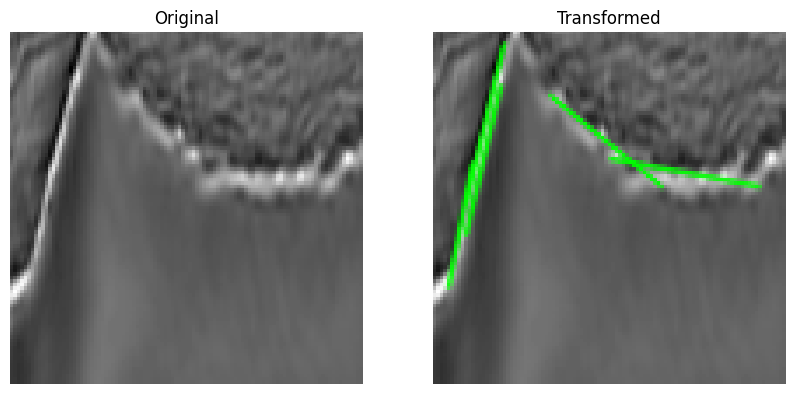

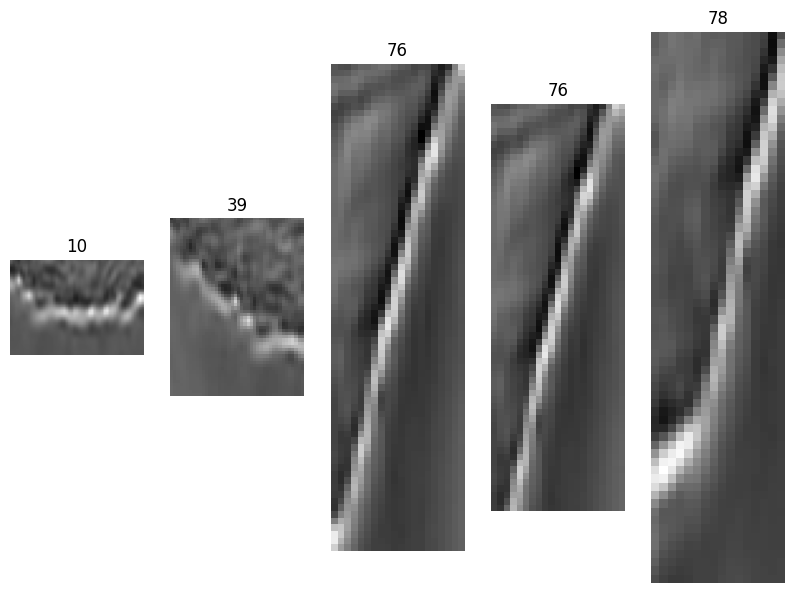

In [20]:
patches, linesP = probHough(original, tresh = 20, minPoints=25, maxGap=5)
dispArrayImages(patches)

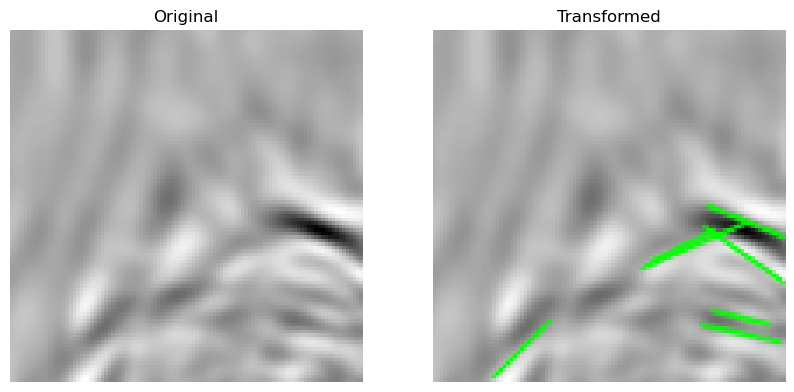

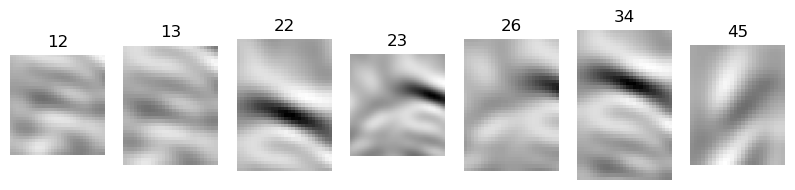

In [167]:

sample_path="tgs_salt/0bdd44d530.png"
mask_path  ="tgs_salt/0a1742c740Mask.png"

original = cv2.imread(sample_path)
patches, linesP = probHough(original, tresh = 20, minPoints=10, maxGap=10)
dispArrayImages(patches)

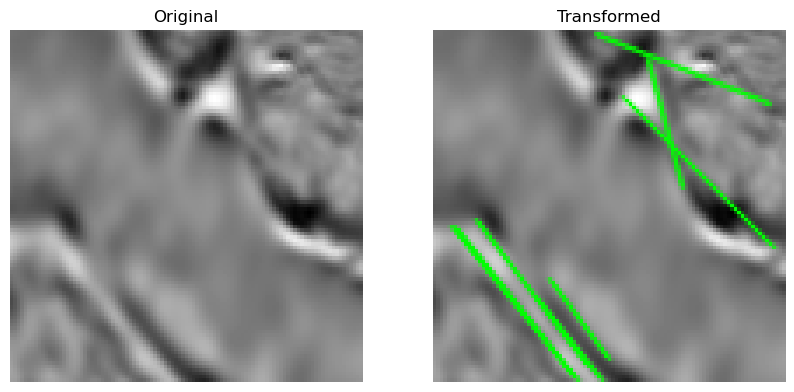

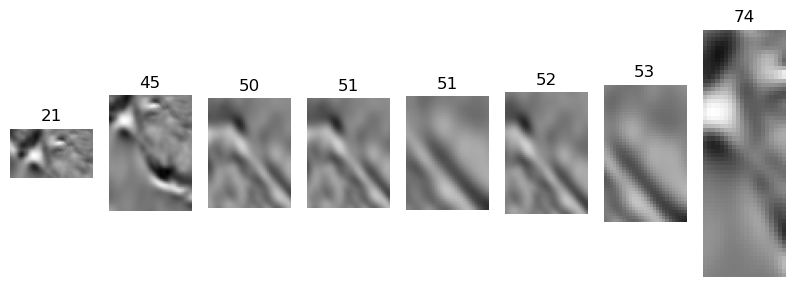

In [173]:
sample_path="tgs_salt/0a1742c740.png"
mask_path  ="tgs_salt/0a1742c740Mask.png"

original = cv2.imread(sample_path)
patches, linesP = probHough(original, tresh = 20, minPoints=20, maxGap=10)
dispArrayImages(patches)



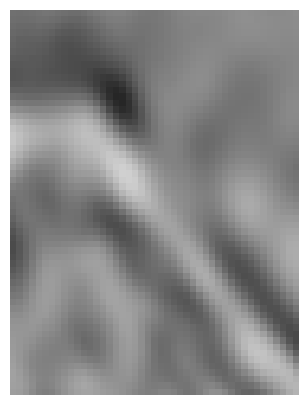

In [185]:
img = searchNearestKey(patches, 49)
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [58]:
#show all images in imagesList
def showImages(imagesList):
    n = len(imagesList)
    if n > 1:
        fig, axs = plt.subplots(1, n , figsize=(5, 5))
        for i in range(n):
            axs[i].imshow(cv2.cvtColor(imagesList[i], cv2.COLOR_BGR2RGB))
            axs[i].axis('off')
        plt.show()
    if n == 1:
        plt.imshow(cv2.cvtColor(imagesList[0], cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
#load a list of images from files
def loadImages(path, imageList):
    loadedImages = []
    for filename in imageList:
        img = cv2.imread(path + '\\' + filename+ '.png') 
        if img is not None:
            loadedImages.append(img)
    return loadedImages


In [124]:
import pandas as pd

TRAIN_CSV = r'D:\_0Luciano\_0PHD\datasets\tgs-salt\train1090.csv'
masksPath = r'D:\_0Luciano\_0PHD\datasets\tgs-salt\masks10-90'
imagesPath = r'D:\_0Luciano\_0PHD\datasets\tgs-salt\train\images'

df_train = pd.read_csv(TRAIN_CSV)
imageList = df_train.iloc[0:50,0]

# iterate over 10 first elements of first column (id)
#for i in range(10):
    # print(df_train.iloc[i,0])
    
imagesList = loadImages(imagesPath, imageList)
masksList = loadImages(masksPath, imageList)
showImages(imagesList)
showImages(masksList)

In [125]:
#iterate over imagesList
patchesList = []
for i in range(len(imagesList)):
    original = imagesList[i] 
    mask = masksList[i]
    patches, linesP = probHough(mask, original, tresh = 15, minPoints=15, maxGap=15)
    #dispArrayImages(patches)
    #append elements of patches to patchesList
    for p in patches:
        patchesList.append(p)



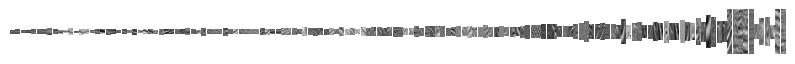

In [130]:
patchesList.sort(key=lambda x: x[0])    

dispArrayImages(patchesList)

In [131]:
len(patchesList)

146

In [136]:
for i in range(len(patchesList)):
    print(patches[0][0])


90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90


: 